<a href="https://colab.research.google.com/github/evaneliz/534groupprojfiles/blob/main/group_project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install numpy pandas seaborn

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [7]:
url = 'https://raw.githubusercontent.com/evaneliz/534groupprojfiles/refs/heads/main/RECLEANEDsocial_explorer_census_data%20-%20RECLEANEDsocial_explorer_census_data.csv'
dftransit = pd.read_csv(url)

In [8]:
dftransit.head()

,Statistics,2080.01,2083.01,2083.02,2084.01,2085.02,2087.1,2087.2,2088.01,2088.02,...,2098.2,2100.1,2111.23,2111.24,2122.02,2122.03,2122.04,2134.01,2134.02,TOTAL
0,total_pop,"2,452","1,904","4,881","4,092","4,208","4,757","3,917","3,397","2,792",...,"2,559","3,349","1,748","4,321","3,417","2,733","3,431","4,818","4,697","115,435"
1,pop_density,"11,025.90","53,050.80","28,733.20","46,144.30","41,750.50","72,312.30","61,583.30","37,559.80","34,191.10",...,"37,004.60","21,208.90","26,316.60","28,329.40","42,863.10","66,581.70","41,683.30","63,633.70","31,045.80","40,539.50"
2,area,0.22,0.04,0.17,0.09,0.1,0.07,0.06,0.09,0.08,...,0.07,0.16,0.07,0.15,0.08,0.04,0.08,0.08,0.15,2.85
3,total_workers,"1,828",961,"2,248","2,154","2,011","2,904","2,070","1,507","1,473",...,"1,230","1,516","1,135","2,291","1,947","1,366","1,801","2,586","2,290","57,498"
4,pct_car_truck_van,59.10%,45.10%,62.50%,52.90%,56.90%,62.80%,43.60%,54.90%,59.60%,...,62.30%,45.40%,46.90%,56.70%,52.60%,51.80%,64.10%,70.30%,68.90%,52.20%


In [11]:
gdf = gpd.read_file("https://raw.githubusercontent.com/gboeing/ppd534/main/data/tl_2017_06_tract/tl_2017_06_tract.shp")
gdf.shape

(8057, 13)

In [12]:
gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,+37.5371514,-122.0081094,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,+37.5293619,-121.9931002,"POLYGON ((-122.0023 37.52984, -122.00224 37.52..."
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."


In [17]:
name = ['2111.24', '2111.23' , '2134.02' , '2134.01' , '2122.04' , '2122.03' , '2122.02' , '2100.10' , '2098.20', '2098.10' , '2095.20' , '2095.10' , '2094.03' , '2094.02' , '2094.01' , '2093' , '2092.01' , '2092.02' , '2091.06' , '2091.05' , '2091.04' , '2091.03' , '2089.04' , '2089.03' , '2089.02' , '2088.02' , '2088.01' , '2087.20' , '2087.10' , '2085.02' , '2084.01' , '2083.02' , '2083.01' , '2080.01']
gdf_tracts = gdf[gdf["NAME"].isin(name)]
gdf_tracts.shape

(27, 13)

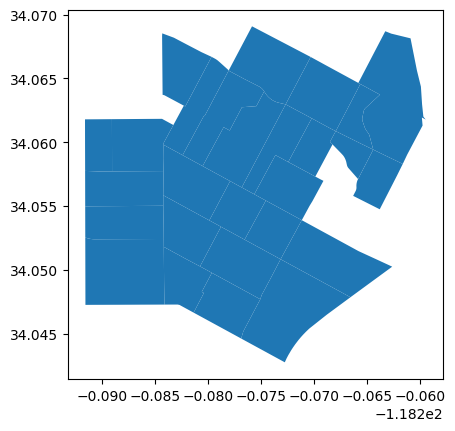

In [18]:
ax = gdf_tracts.plot()

In [19]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands